# Task 2 

# Build a model to detect fraudulent credit card transactions. Use adataset containing information about credit card transactions, andexperiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.



# The steps that would be followed are :-
1) Data Collection
2) Exploratory Data Analysis
3) Feature Engineering 
4) Model Training
5) Validation/Testing 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
train_data=pd.read_csv("fraudTrain.csv")

In [3]:
test_data=pd.read_csv("fraudTest.csv")

In [4]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train_data.isnull

<bound method DataFrame.isnull of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [7]:
train_data.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data_con= pd.concat([train_data, test_data])
data_con.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
train_data.isna().value_counts()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  category  amt    first  last   gender  street  city   state  zip    lat    long   city_pop  job    dob    trans_num  unix_time  merch_lat  merch_long  is_fraud
False       False                  False   False     False     False  False  False  False   False   False  False  False  False  False  False     False  False  False      False      False      False       False       1296675
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

l_e_columns = ['merchant', 'category', 'gender', 'state', 'job']
for c in l_e_columns:
    label_encoder = LabelEncoder()
    data_con[c] = label_encoder.fit_transform(data_con[c])
    label_encoders[c] = label_encoder
    
    train_data[c] = label_encoder.fit_transform(train_data[c])
    label_encoders[c] = label_encoder
    
    test_data[c] = label_encoder.fit_transform(test_data[c])
    label_encoders[c] = label_encoder


In [11]:
data_con['trans_date_trans_time'] = pd.to_datetime(data_con['trans_date_trans_time'])
data_con['dob'] = pd.to_datetime(data_con['dob'])

data_con['transaction_year'] = data_con['trans_date_trans_time'].dt.year
data_con['transaction_month'] = data_con['trans_date_trans_time'].dt.month
data_con['transaction_day'] = data_con['trans_date_trans_time'].dt.day
data_con['transaction_hour'] = data_con['trans_date_trans_time'].dt.hour

data_con['birth_year'] = data_con['dob'].dt.year
data_con['birth_month'] = data_con['dob'].dt.month
data_con['birth_day'] = data_con['dob'].dt.day
data_con.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

train_data['transaction_year'] = train_data['trans_date_trans_time'].dt.year
train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day
train_data['transaction_hour'] = train_data['trans_date_trans_time'].dt.hour

train_data['birth_year'] = train_data['dob'].dt.year
train_data['birth_month'] = train_data['dob'].dt.month
train_data['birth_day'] = train_data['dob'].dt.day

train_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

test_data['transaction_year'] = test_data['trans_date_trans_time'].dt.year
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day
test_data['transaction_hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['birth_year'] = test_data['dob'].dt.year
test_data['birth_month'] = test_data['dob'].dt.month
test_data['birth_day'] = test_data['dob'].dt.day

test_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [12]:
data_con.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train_data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test_data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1296675 non-null  int64  
 1   cc_num             1296675 non-null  int64  
 2   merchant           1296675 non-null  int32  
 3   category           1296675 non-null  int32  
 4   amt                1296675 non-null  float64
 5   gender             1296675 non-null  int32  
 6   state              1296675 non-null  int32  
 7   zip                1296675 non-null  int64  
 8   lat                1296675 non-null  float64
 9   long               1296675 non-null  float64
 10  city_pop           1296675 non-null  int64  
 11  job                1296675 non-null  int32  
 12  unix_time          1296675 non-null  int64  
 13  merch_lat          1296675 non-null  float64
 14  merch_long         1296675 non-null  float64
 15  is_fraud           1296675 non-n

In [14]:
train_data.describe()

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,3.428585e+02,6.227787e+00,7.035104e+01,4.525513e-01,2.667728e+01,4.880067e+04,3.853762e+01,-9.022634e+01,...,3.853734e+01,-9.022646e+01,5.788652e-03,2.019287e+03,6.142150e+00,1.558798e+01,1.280486e+01,1.973257e+03,6.526238e+00,1.566116e+01
std,3.743180e+05,1.308806e+18,2.009519e+02,3.913443e+00,1.603160e+02,4.977437e-01,1.433098e+01,2.689322e+04,5.075808e+00,1.375908e+01,...,5.109788e+00,1.377109e+01,7.586269e-02,4.522452e-01,3.417703e+00,8.829121e+00,6.817824e+00,1.737848e+01,3.397599e+00,8.887451e+00
min,0.000000e+00,6.041621e+10,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,...,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.924000e+03,1.000000e+00,1.000000e+00
25%,3.241685e+05,1.800429e+14,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,1.500000e+01,2.623700e+04,3.462050e+01,-9.679800e+01,...,3.473357e+01,-9.689728e+01,0.000000e+00,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.962000e+03,4.000000e+00,8.000000e+00
50%,6.483370e+05,3.521417e+15,3.460000e+02,6.000000e+00,4.752000e+01,0.000000e+00,2.800000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,...,3.936568e+01,-8.743839e+01,0.000000e+00,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,1.975000e+03,7.000000e+00,1.500000e+01
75%,9.725055e+05,4.642255e+15,5.140000e+02,1.000000e+01,8.314000e+01,1.000000e+00,3.800000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,...,4.195716e+01,-8.023680e+01,0.000000e+00,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,1.987000e+03,9.000000e+00,2.300000e+01
max,1.296674e+06,4.992346e+18,6.920000e+02,1.300000e+01,2.894890e+04,1.000000e+00,5.000000e+01,9.978300e+04,6.669330e+01,-6.795030e+01,...,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,2.005000e+03,1.200000e+01,3.100000e+01


<Axes: xlabel='is_fraud', ylabel='count'>

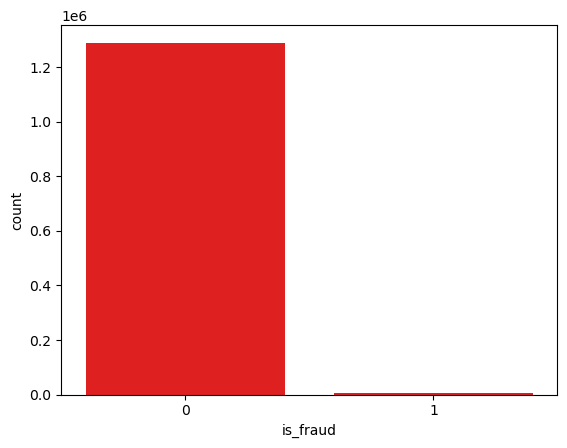

In [15]:
sns.countplot(data=train_data,x="is_fraud",color="red")

In [16]:
data_con = data_con.reset_index(drop=True)


<Axes: >

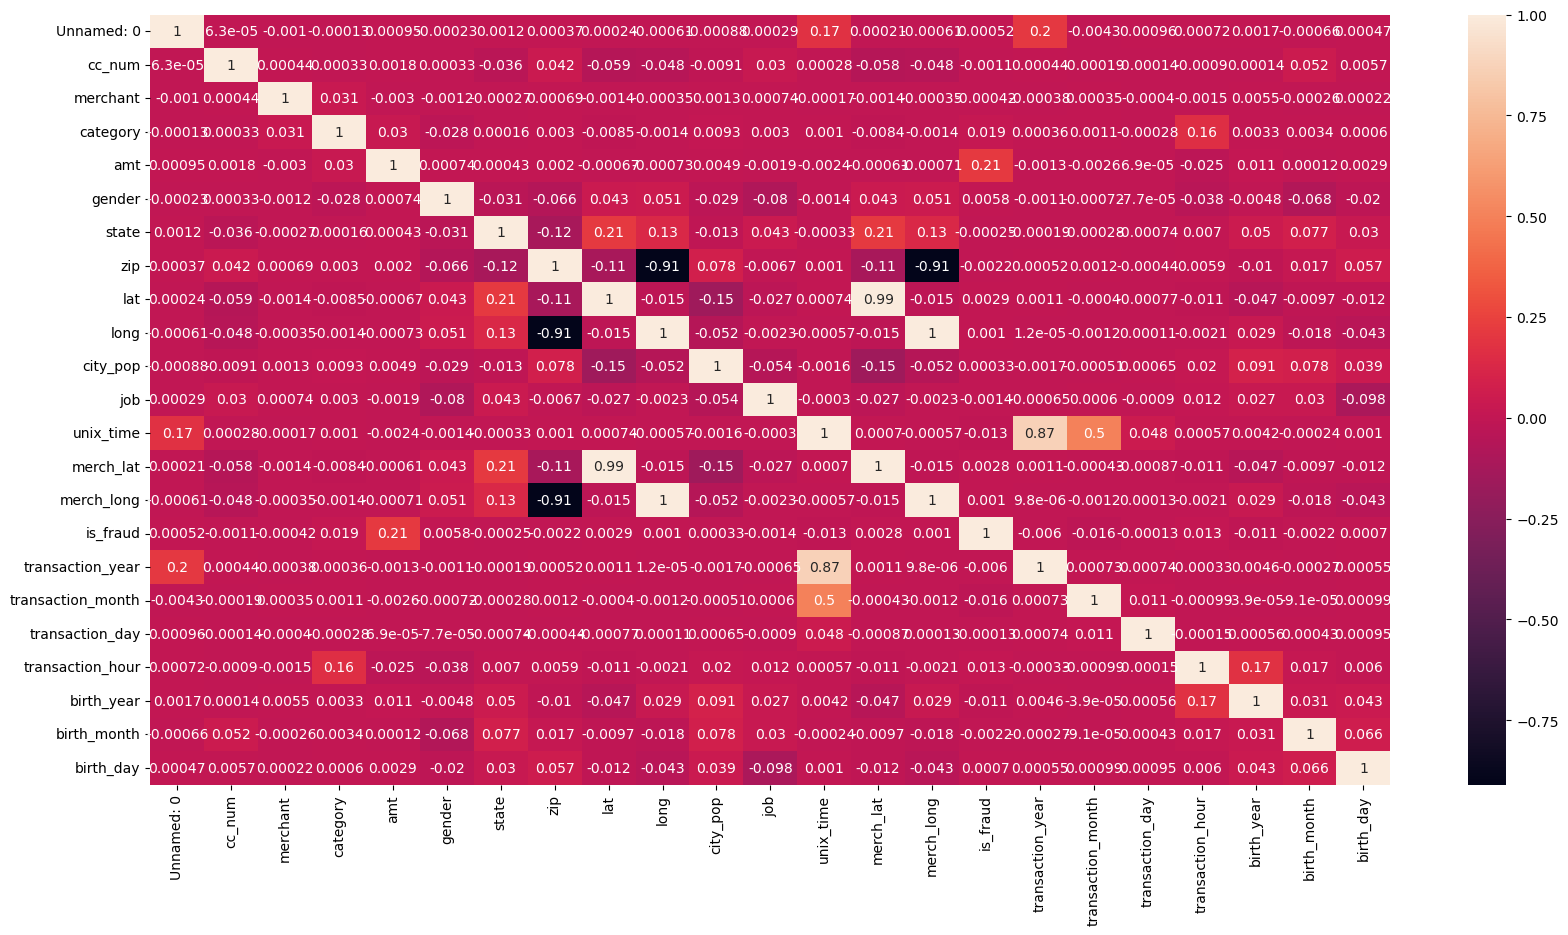

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data_con.corr(),annot=True,color='yellow')

In [18]:
X = data_con.drop('is_fraud', axis=1)
y = data_con['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


# Training the model for logisticRegression


In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368464
           1       0.00      0.00      0.00      2015

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368464      0]
 [  2015      0]]
Accuracy: 0.9945610952307689


# Training the model for logisticRegression(Log model)


In [20]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujee\Documents\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368464
           1       0.00      0.00      0.00      2015

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368464      0]
 [  2015      0]]
Accuracy: 0.9945610952307689


# Training the model with DecisionTreeClassifier


In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368464
           1       0.81      0.84      0.82      2015

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368054    410]
 [   319   1696]]
Accuracy: 0.9980322771331168
